2016-05-03 10:51:56,926 - modeltools.grid._grid -   DEBUG: Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
2016-05-03 10:51:56,928 - modeltools.grid._grid -   DEBUG: Lower left corner lon/lat of grid: (-20,60)
2016-05-03 10:51:56,929 - modeltools.grid._grid -   DEBUG: Grid spacing in projection coords: (4e+03,4e+03)
2016-05-03 10:51:56,929 - modeltools.grid._grid -   DEBUG: Number of grid Nodes in x/y      : (  500,  300)
2016-05-03 10:51:56,995 - modeltools.grid._grid -   DEBUG: Min   x projection coordinate = -1.1e+06
2016-05-03 10:51:56,996 - modeltools.grid._grid -   DEBUG: Max   x projection coordinate = 9.02e+05
2016-05-03 10:51:56,996 - modeltools.grid._grid -   DEBUG: Min   y projection coordinate = 1.64e+05
2016-05-03 10:51:56,997 - modeltools.grid._grid -   DEBUG: Max   y projection coordinate = 1.37e+06
2016-05-03 10:51:56,998 - modeltools.grid._grid -   DEBUG: Min lon = -29.6
2016-05-03 10:51:56,999 - modeltools.grid._grid -   DEB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


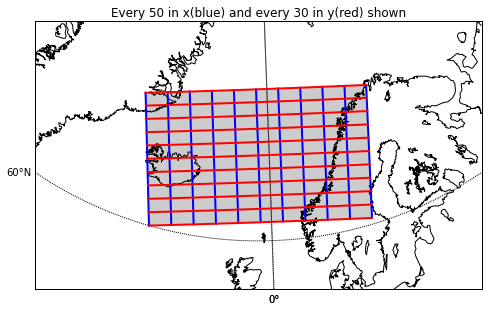

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import abfile
import pylab
pylab.rcParams['figure.figsize'] = 12, 8

grid1=modeltools.grid.Proj4Grid("+proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere",
                              -20,60,4000,4000,500,300)
#grid1.save_to_scrip("regionalocn.nc",None)
figure=grid1.plotgrid(2)
matplotlib.pyplot.show()
tmpdict=modeltools.grid.create_datadict_hycom(grid1)
regf = abfile.write_regional_grid(tmpdict)


2016-05-03 10:52:05,001 - modeltools.grid._grid -   DEBUG: Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=40 +lat_ts=40 +ellipse=sphere
2016-05-03 10:52:05,002 - modeltools.grid._grid -   DEBUG: Lower left corner lon/lat of grid: (-70,10)
2016-05-03 10:52:05,002 - modeltools.grid._grid -   DEBUG: Grid spacing in projection coords: (2e+04,2e+04)
2016-05-03 10:52:05,003 - modeltools.grid._grid -   DEBUG: Number of grid Nodes in x/y      : (  800,  400)
2016-05-03 10:52:05,003 - modeltools.grid._grid -   DEBUG: Min   x projection coordinate = -8.63e+06
2016-05-03 10:52:05,004 - modeltools.grid._grid -   DEBUG: Max   x projection coordinate = 7.39e+06
2016-05-03 10:52:05,005 - modeltools.grid._grid -   DEBUG: Min   y projection coordinate = -7.94e+05
2016-05-03 10:52:05,005 - modeltools.grid._grid -   DEBUG: Max   y projection coordinate = 7.23e+06
2016-05-03 10:52:05,006 - modeltools.grid._grid -   DEBUG: Min lon = -180
2016-05-03 10:52:05,007 - modeltools.grid._grid -   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


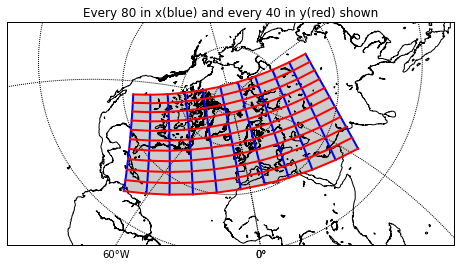

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
grid2=modeltools.grid.Proj4Grid("+proj=stere +lon_0=0 +lat_0=40 +lat_ts=40 +ellipse=sphere",
                              -70,10,20000,20000,800,400)
figure=grid2.plotgrid(2)
matplotlib.pyplot.show()

In [8]:
import abfile


grid1.write_my_projection_info()
tmpdict=modeltools.grid.create_datadict_hycom(grid1)
regf = abfile.write_regional_grid(tmpdict)
grid1.Nx*grid1.Ny*8*2


2400000

2016-05-03 10:53:30,271 - modeltools.grid._grid -   DEBUG: Initialized P-grid using projection  +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
2016-05-03 10:53:30,272 - modeltools.grid._grid -   DEBUG: Lower left corner lon/lat of grid: (-20,60)
2016-05-03 10:53:30,272 - modeltools.grid._grid -   DEBUG: Grid spacing in projection coords: (4e+03,4e+03)
2016-05-03 10:53:30,273 - modeltools.grid._grid -   DEBUG: Number of grid Nodes in x/y      : (  500,  300)
2016-05-03 10:53:30,273 - modeltools.grid._grid -   DEBUG: Min   x projection coordinate = -1.1e+06
2016-05-03 10:53:30,274 - modeltools.grid._grid -   DEBUG: Max   x projection coordinate = 9.02e+05
2016-05-03 10:53:30,275 - modeltools.grid._grid -   DEBUG: Min   y projection coordinate = 1.64e+05
2016-05-03 10:53:30,275 - modeltools.grid._grid -   DEBUG: Max   y projection coordinate = 1.37e+06
2016-05-03 10:53:30,276 - modeltools.grid._grid -   DEBUG: Min lon = -29.6
2016-05-03 10:53:30,277 - modeltools.grid._grid -   DE

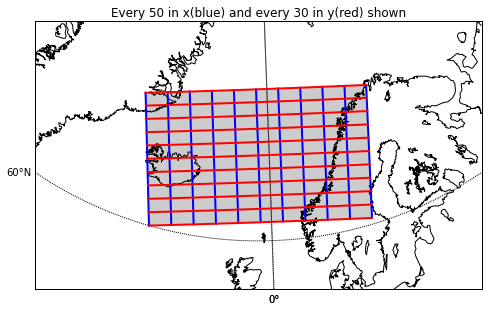

In [9]:
grid1 = modeltools.grid.Proj4Grid.grid_from_file(filename="proj.info")
figure=grid1.plotgrid(2)
matplotlib.pyplot.show()

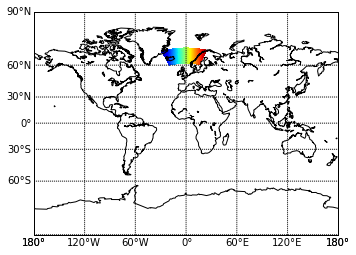

In [15]:
import numpy
from mpl_toolkits.basemap import Basemap
za = abfile.ABFileGrid("regional.grid","r")
lo = za.read_field("plon")
la = za.read_field("plat")
m = Basemap(projection='mill')
x,y=m(lo,la)
m.drawcoastlines()
m.drawmapboundary() # draw a line around the map region
m.drawparallels(numpy.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
m.pcolormesh(x,y,lo)   
